## Monte Carlo simulation of Hard sphere model

Let's plot the radial distribution function $g(r)$ for various densities:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os 
plt.style.use('science')

Verify that the code is stable and give stable results (one set of beta + swap rates). Produce equilibrated configurations at a given β:

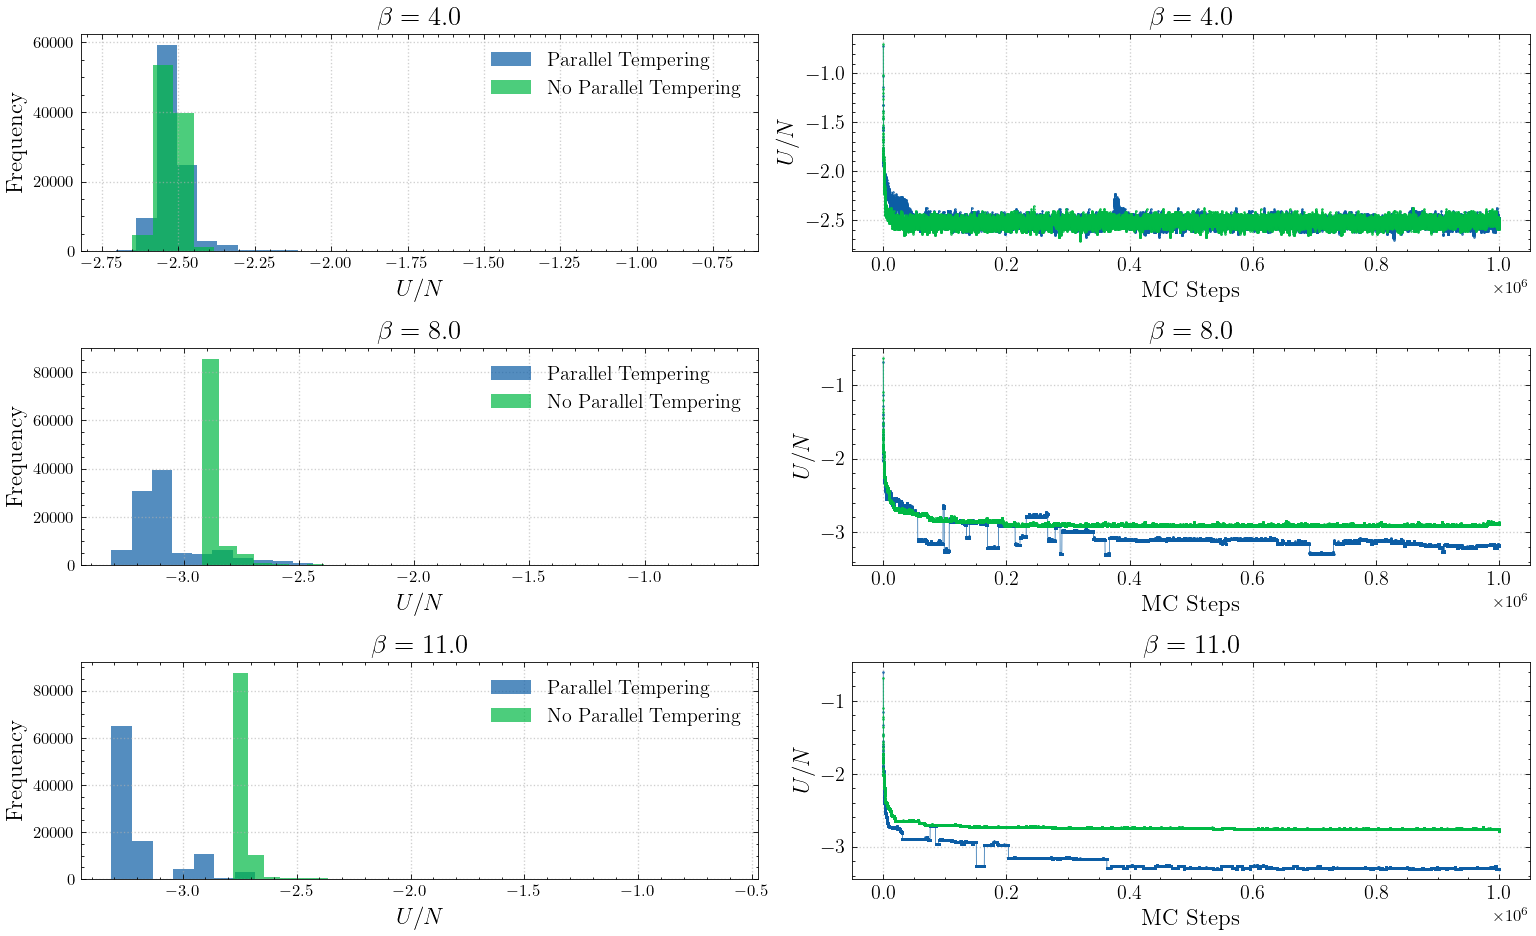

In [91]:
# Energy analysis
data = np.loadtxt('./data/energy_beta4.000000.dat')
dataNoSwap = np.loadtxt('./data/energy_beta4.000000_noSwap.dat')
# Create a figure with two plots: histogram and line plot
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(13, 8), dpi=120)
ax1.set_title(r'$\beta = 4.0$', fontsize=16)
ax2.set_title(r'$\beta = 4.0$', fontsize=16)
ax1.hist(data[:,1], bins = 30, alpha=0.7, label=r'Parallel Tempering')
ax1.hist(dataNoSwap[:,1], bins = 30, alpha=0.7, label=r'No Parallel Tempering')
ax1.set_xlabel(r'$U/N$', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
ax1.legend(framealpha=0.9, fontsize=12)
ax2.plot(data[:,0], data[:,1], marker = "o", markersize=0.5, linestyle='-', linewidth=0.4)
ax2.plot(dataNoSwap[:,0], dataNoSwap[:,1], marker = "o", markersize=0.5, linestyle='-', linewidth=0.4)
ax2.set_xlabel('MC Steps', fontsize=14)
ax2.set_ylabel(r'$U/N$', fontsize=14)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)

data = np.loadtxt('./data/energy_beta8.000000.dat')
dataNoSwap = np.loadtxt('./data/energy_beta8.000000_noSwap.dat')
ax3.hist(data[:,1], bins = 30, alpha=0.7, label=r'Parallel Tempering')
ax3.set_title(r'$\beta = 8.0$', fontsize=16)
ax4.set_title(r'$\beta = 8.0$', fontsize=16)
ax3.hist(dataNoSwap[:,1], bins = 30, alpha=0.7, label=r'No Parallel Tempering')
ax3.set_xlabel(r'$U/N$', fontsize=14)
ax3.set_ylabel('Frequency', fontsize=14)
ax3.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
ax3.legend(framealpha=0.9, fontsize=12)
ax4.plot(data[:,0], data[:,1], marker = "o", markersize=0.5, linestyle='-', linewidth=0.4)
ax4.plot(dataNoSwap[:,0], dataNoSwap[:,1], marker = "o", markersize=0.5, linestyle='-', linewidth=0.4)
ax4.set_xlabel('MC Steps', fontsize=14)
ax4.set_ylabel(r'$U/N$', fontsize=14)
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=12)
ax4.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)

data = np.loadtxt('./data/energy_beta11.000000.dat')
dataNoSwap = np.loadtxt('./data/energy_beta11.000000_noSwap.dat')

ax5.hist(data[:,1], bins = 30, alpha=0.7, label=r'Parallel Tempering')
ax5.set_title(r'$\beta = 11.0$', fontsize=16)
ax6.set_title(r'$\beta = 11.0$', fontsize=16)
ax5.hist(dataNoSwap[:,1], bins = 30, alpha=0.7, label=r'No Parallel Tempering')
ax5.set_xlabel(r'$U/N$', fontsize=14)
ax5.set_ylabel('Frequency', fontsize=14)
ax5.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
ax5.legend(framealpha=0.9, fontsize=12)
ax6.plot(data[:,0], data[:,1], marker = "o", markersize=0.5, linestyle='-', linewidth=0.4)
ax6.plot(dataNoSwap[:,0], dataNoSwap[:,1], marker = "o", markersize=0.5, linestyle='-', linewidth=0.4)
ax6.set_xlabel('MC Steps', fontsize=14)
ax6.set_ylabel(r'$U/N$', fontsize=14)
ax6.tick_params(axis='x', labelsize=12)
ax6.tick_params(axis='y', labelsize=12)
ax6.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)

plt.tight_layout()
plt.savefig('/home/lrizzi17/NumericalMethods/tex2/FIG/Energy_Histograms_LowT.pdf', dpi=120)
plt.show()

Measure the energy and specific heat:

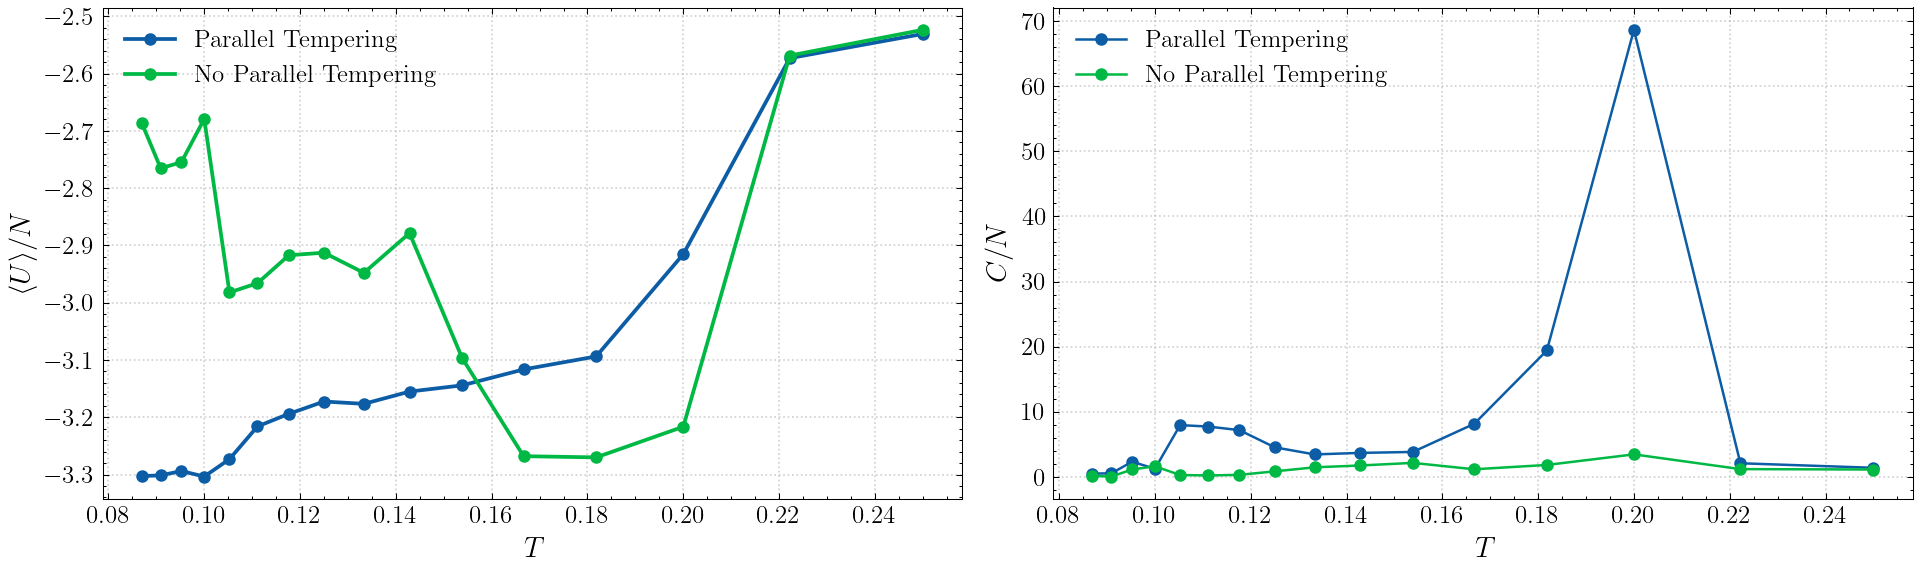

In [ ]:
beta = [1.,   1.05, 1.2,  1.25, 1.4,  1.45, 1.6,  1.65, 1.8,  1.85, 2.,   2.05, 2.2,  2.25, 2.4,  2.45]
beta = [11.5, 11, 10.5, 10, 9.5, 9, 8.5, 8, 7.5, 7, 6.5, 6, 5.5, 5, 4.5, 4] 
deltaTemp = np.array(beta[1:]) - np.array(beta[:-1])

plt.figure(figsize=(13, 4), dpi=150)
average_energies = []
variance_energies = []
average_energies_noSwap = []
variance_energies_noSwap = []

burnin = 80000
for t in beta:
    data = np.loadtxt(f'./data/energy_beta{t:.6f}.dat')
    data_noSwap = np.loadtxt(f'./data/energy_beta{t:.6f}_noSwap.dat')
    average_energy = np.mean(data[burnin:,1])
    variance_energy = 64* np.var(data[burnin:,1]) * (t*t)
    average_energy_noSwap = np.mean(data_noSwap[burnin:,1])
    variance_energy_noSwap = 64* np.var(data_noSwap[burnin:,1]) * (t*t)
    average_energies.append(average_energy)
    variance_energies.append(variance_energy)
    average_energies_noSwap.append(average_energy_noSwap)
    variance_energies_noSwap.append(variance_energy_noSwap)

temperatures = [1./float(x) for x in beta]
plt.subplot(1, 2, 1)
plt.plot(temperatures, average_energies, marker = "o", markersize=5, linestyle='-', linewidth=1.8, label ='Parallel Tempering')
plt.plot(temperatures, average_energies_noSwap, marker = "o", markersize=5, linestyle='-', linewidth=1.8, label ='No Parallel Tempering')
plt.xlabel(r'$T$', fontsize=14)
plt.ylabel(r'$\langle U \rangle / N$', fontsize=14)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
plt.tight_layout()
plt.legend(framealpha=0.9, fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(temperatures, variance_energies, marker = "o", markersize=5, linestyle='-', linewidth=1.2, label = "Parallel Tempering")
plt.plot(temperatures, variance_energies_noSwap, marker = "o", markersize=5, linestyle='-', linewidth=1.2, label = "No Parallel Tempering")
plt.xlabel('$T$', fontsize=14)
plt.ylabel('$C / N$', fontsize=14)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
plt.legend(framealpha=0.9, fontsize=12)
plt.tight_layout()
#plt.savefig('/home/lrizzi17/NumericalMethods/tex2/FIG/Energy_SpecificHeat_LowT.pdf', dpi=300)
plt.show()

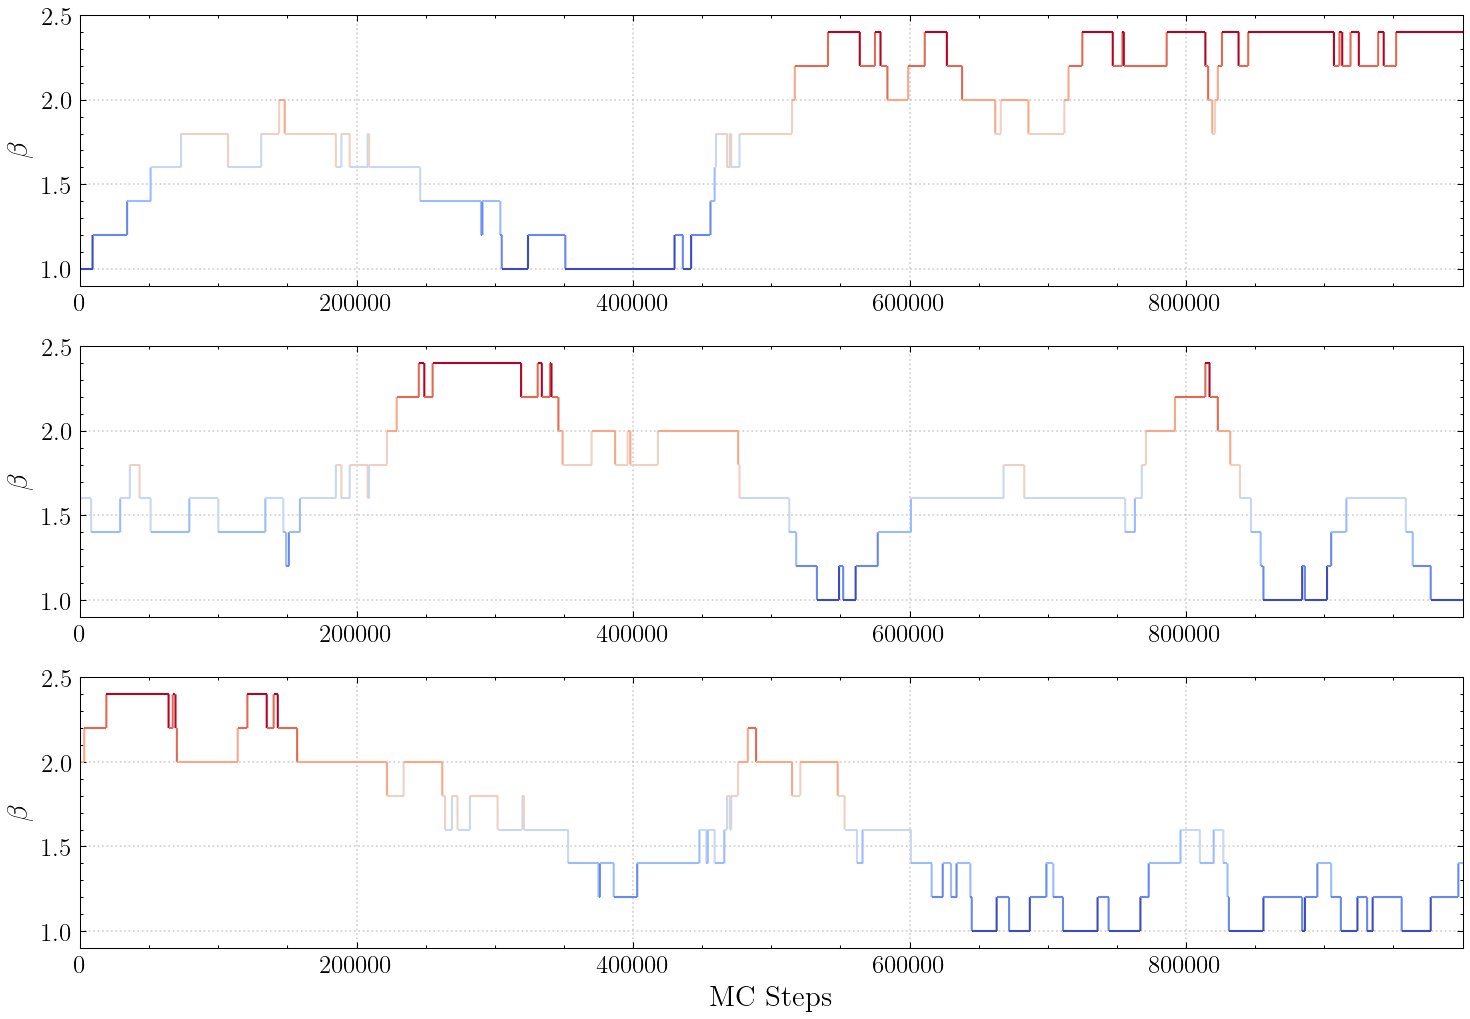

In [84]:
from matplotlib.collections import LineCollection

plt.figure(figsize=(10, 7), dpi=150)

datasets = []
y_vals = []
for idx in [0, 3, 5]:
    d = np.loadtxt(f'./data/Path{idx}.dat')
    y = 1 / d[:, 1]
    datasets.append((idx, d[:, 0], y))
    y_vals.append(y)

ymin, ymax = np.min(np.concatenate(y_vals)), np.max(np.concatenate(y_vals))
norm = plt.Normalize(ymin, ymax)
cmap = plt.cm.coolwarm 

for plot_idx, (temp_idx, x, y) in enumerate(datasets, start=1):
    ax = plt.subplot(3, 1, plot_idx)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cmap, norm=norm, alpha=1, linewidth=2.5)
    lc.set_array(y[:-1])
    lc.set_linewidth(1)
    ax.add_collection(lc)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(0.9, 2.5)
    ax.set_ylabel(r'$\beta$', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
    if plot_idx == 3:
        ax.set_xlabel('MC Steps', fontsize=14)

plt.tight_layout()
plt.savefig('/home/lrizzi17/NumericalMethods/tex2/FIG/TemperaturePaths.pdf', dpi=300)
plt.show()

## Multiple histogram method

In [32]:
import numpy as np
import matplotlib.pyplot as plt

N_part = 64
beta = [4,5,6,7,8,9,10,11]
beta = [1., 1.2, 1.4, 1.6, 1.8, 2., 2.2, 2.4] 
K = len(beta)

n_bins = 2000  # Number of bins for the global histogram
burnin = 50000 # Rows to discard for equilibration
tol = 1e-7 # Tolerance for convergence
max_iter = 5000  # Iteration limit

# --- 1. DATA LOADING AND GLOBAL BINNING ---
energy_data = [] # List of arrays, one for each T
M_k = []         # Number of valid samples for each T (M_k in your formula)

for b in beta:
    raw = np.loadtxt(f'./data/energy_beta{b:.6f}.dat')
    E_total = raw[burnin:, 1] * N_part 
    energy_data.append(E_total)
    M_k.append(len(E_total))

M_k = np.array(M_k)

all_energies = np.concatenate(energy_data)
E_min, E_max = np.min(all_energies), np.max(all_energies)
bins = np.linspace(E_min - 0.1, E_max + 0.1, n_bins + 1)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
n_bins_actual = len(bin_centers)

# Build the histograms N_k(E)
histograms = np.zeros((K, n_bins_actual))
for i in range(K):
    hist, _ = np.histogram(energy_data[i], bins=bins)
    histograms[i, :] = hist

In [ ]:
histograms.shape



(8, 2000)

In [40]:
# Log-sum trick setup:
beta = np.array(beta)
H_tot = np.sum(histograms, axis=0)

# Maschera per i bin validi (evitiamo log(0))
valid_mask = H_tot > 0
E_valid = bin_centers[valid_mask]
H_tot_valid = H_tot[valid_mask]


F_k = np.zeros(K) 
F_k_old = np.zeros(K)

for iteration in range(max_iter):
    
    log_terms = np.zeros((K, len(E_valid)))
    for k in range(K): # Compute lambda term
        log_terms[k, :] = np.log(M_k[k]) - beta[k] * E_valid + F_k[k]
    
    # LogSumExp trick: log(sum(exp(x))) = max + log(sum(exp(x-max)))
    max_log = np.max(log_terms, axis=0)
    log_denom = max_log + np.log(np.sum(np.exp(log_terms - max_log), axis=0))
    
    ln_rho = np.log(H_tot_valid) - log_denom
    
    for k in range(K):
        log_integrand = ln_rho - beta[k] * E_valid
        
        # LogSumExp sull'energia
        max_val = np.max(log_integrand)
        log_Z = max_val + np.log(np.sum(np.exp(log_integrand - max_val)))
        F_k[k] = -log_Z
        
    F_k -= F_k[0]
    
    diff = np.max(np.abs(F_k - F_k_old))
    if diff < tol:
        print(f"Convergenza raggiunta in {iteration} iterazioni. Diff: {diff:.2e}")
        break
    
    F_k_old = F_k.copy()
    
    if iteration % 500 == 0:
        print(f"Iter {iteration}, Diff: {diff:.2e}")

Iter 0, Diff: 7.02e+01
Convergenza raggiunta in 294 iterazioni. Diff: 9.52e-08


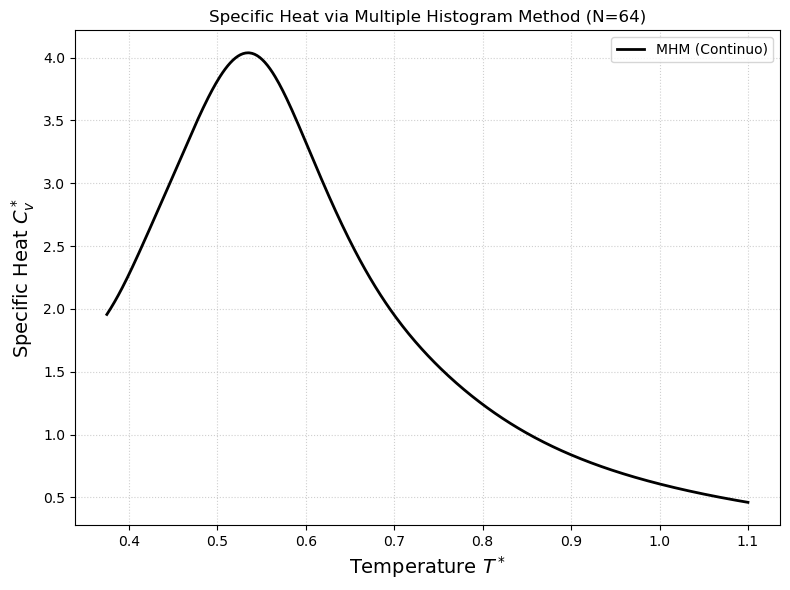

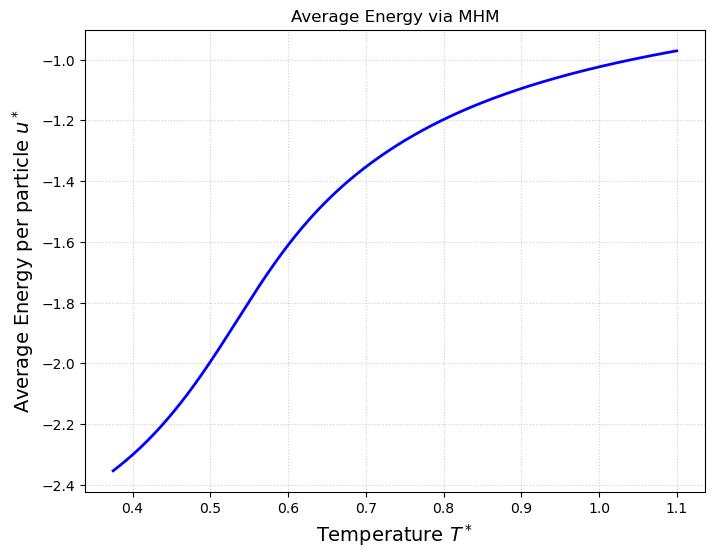

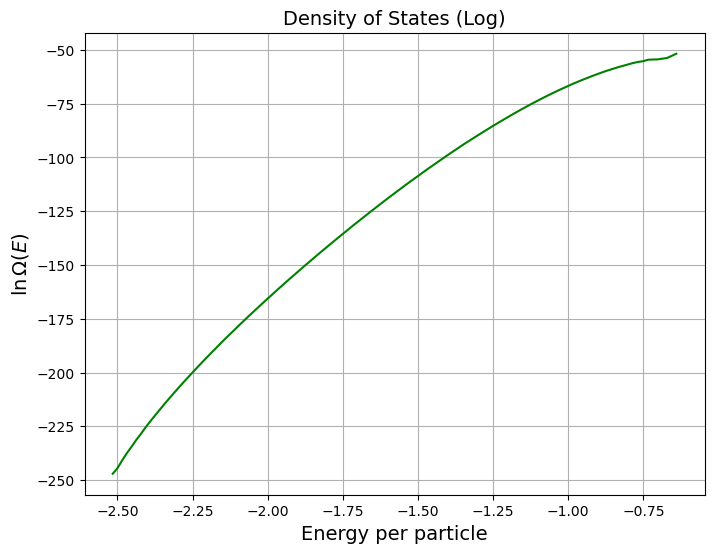

In [41]:
T_min = 1.0 / np.max(beta)
T_max = 1.0 / np.min(beta)
T_continuo = np.linspace(T_min * 0.9, T_max * 1.1, 500)

Cv_continuo = []
E_avg_continuo = []

for T_val in T_continuo:
    beta_val = 1.0 / T_val
    log_weights = ln_rho - beta_val * E_valid
    
    log_weights -= np.max(log_weights)
    weights = np.exp(log_weights)
    norm = np.sum(weights)
    
    # Valori medi <E> e <E^2> (E qui è l'energia TOTALE del sistema)
    avg_E = np.sum(E_valid * weights) / norm
    avg_E2 = np.sum((E_valid**2) * weights) / norm
    
    # Calore specifico: Cv = ( <E^2> - <E>^2 ) / (N * T^2)
    # ATTENZIONE: Dividiamo per N_part per avere grandezze intensive
    val_cv = (avg_E2 - avg_E**2) / (T_val**2) / N_part
    val_E = avg_E / N_part
    
    Cv_continuo.append(val_cv)
    E_avg_continuo.append(val_E)

# --- 4. PLOTTING ---
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(T_continuo, Cv_continuo, 'k-', linewidth=2, label='MHM (Continuo)')
plt.xlabel('Temperature $T^*$', fontsize=14)
plt.ylabel('Specific Heat $C_v^*$', fontsize=14)
plt.title(f'Specific Heat via Multiple Histogram Method (N={N_part})')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Energia Media per particella
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(T_continuo, E_avg_continuo, 'b-', linewidth=2, label='MHM (Continuo)')
plt.xlabel('Temperature $T^*$', fontsize=14)
plt.ylabel('Average Energy per particle $u^*$', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.6)
plt.title('Average Energy via MHM')
plt.show()

# Plot Densità degli stati (Log scale)
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(E_valid / N_part, ln_rho, 'g-', label=r'$\ln \rho(E)$')
plt.xlabel('Energy per particle', fontsize=14)
plt.ylabel(r'$\ln \Omega(E)$', fontsize=14)
plt.title('Density of States (Log)', fontsize=14)
plt.grid(True)
plt.show()